In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
path = '/Users/emmadionne/Documents/'
file = 'test_angs_metrics.hdf5'
tsv_output_file = path + "test_angs_mags_metrics.csv"
data = pd.DataFrame.from_csv(tsv_output_file)

print(data.head())

   mov.mean  mov.std  mov.mode  mov.range  mov.eventrest  mov.maxeventval  \
0       0.0      0.0      3675        0.0              0              0.0   
1       0.0      0.0      3675        0.0              0              0.0   
2       0.0      0.0      3675        0.0              0              0.0   
3       0.0      0.0      3675        0.0              0              0.0   
4       0.0      0.0      3675        0.0              0              0.0   

   mov.surfarea  mov.totalmag  mov.firstder  mov.secder  ...  mov.timetoevent  \
0             0           0.0           0.0         0.0  ...              114   
1             0           0.0           0.0         0.0  ...              113   
2             0           0.0           0.0         0.0  ...              112   
3             0           0.0           0.0         0.0  ...              111   
4             0           0.0           0.0         0.0  ...              110   

   move.timefromevent  brain.data  brain.eventrest

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [3]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

datacopy = data.copy()
datacopy -= datacopy.min()
datacopy /= datacopy.max()
data = datacopy.fillna(value=0)

#print(data.head())

In [4]:
# notnoise_index = data.loc[data['move_standard_deviation'] < 1].index
# data = data.loc[notnoise_index]

# def sepHist(data, artifact, noise):
    
#     noisedf = data[classify == 2]
#     artifactdf = data[classify == 1]
#     sigdf = data[classify == 0]
#     return noisedf, artifactdf, sigdf

# noisedf, artifactdf, sigdf = sepHist(data, artifact, noise)

artifact_index = data.loc[data['move_event_or_rest'] == 1].index
signal_index = data.loc[data['brain_event_or_rest'] == 1].index

for col in col_list:
    print(col)

    fig , ax1 = plt.subplots()
    ax1.hist(data.loc[artifact_index, col], bins = 25, alpha = 0.5, label ='artifact', color = 'g')
    ax1.grid(False)         
    ax1.set_xlabel('Values')
    ax1.set_ylabel('# of instances', color = 'green')

    ax2 = ax1.twinx()
    ax2.hist(data.loc[signal_index, col], bins = 25, alpha = 0.5, label ='signal', color = 'b')
    ax2.set_ylabel('# of instances', color = 'blue')
    ax2.grid(False)
#     ax2.hist(noisedf[col].dropna(), bins = 25, alpha = 0.5, label ='noise', color = 'r')
#     ax2.set_xlabel('Values')
#     ax2.set_ylabel('# of instances', color = 'red')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

    
    
#     fig = plt.figure()
#     x = data.loc[(data[col]) & (noise[:X_reduced_tsne.shape[0]] == 0)]
#     y = data.iloc[[noise[:X_reduced_tsne.shape[0]] == 1],col]
#     ax = fig.add_subplot(111)
#     _ = ax.hist(x)
#     _ = ax.hist(y, color ='red', alpha=0.3)
    
# #     data[col,np.where(noise[:X_reduced_tsne.shape[0]] == 0)]
# #     d
#     plt.show()

# for col in col_list:
#     print(col)
#     data3[col].apply(np.log2).hist(by = noise[:X_reduced_tsne.shape[0]])
#     plt.show()


KeyError: 'move_event_or_rest'

In [5]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

datacopy = data.copy()
datacopy -= datacopy.min()
datacopy /= datacopy.max()
data = datacopy.fillna(value=0)

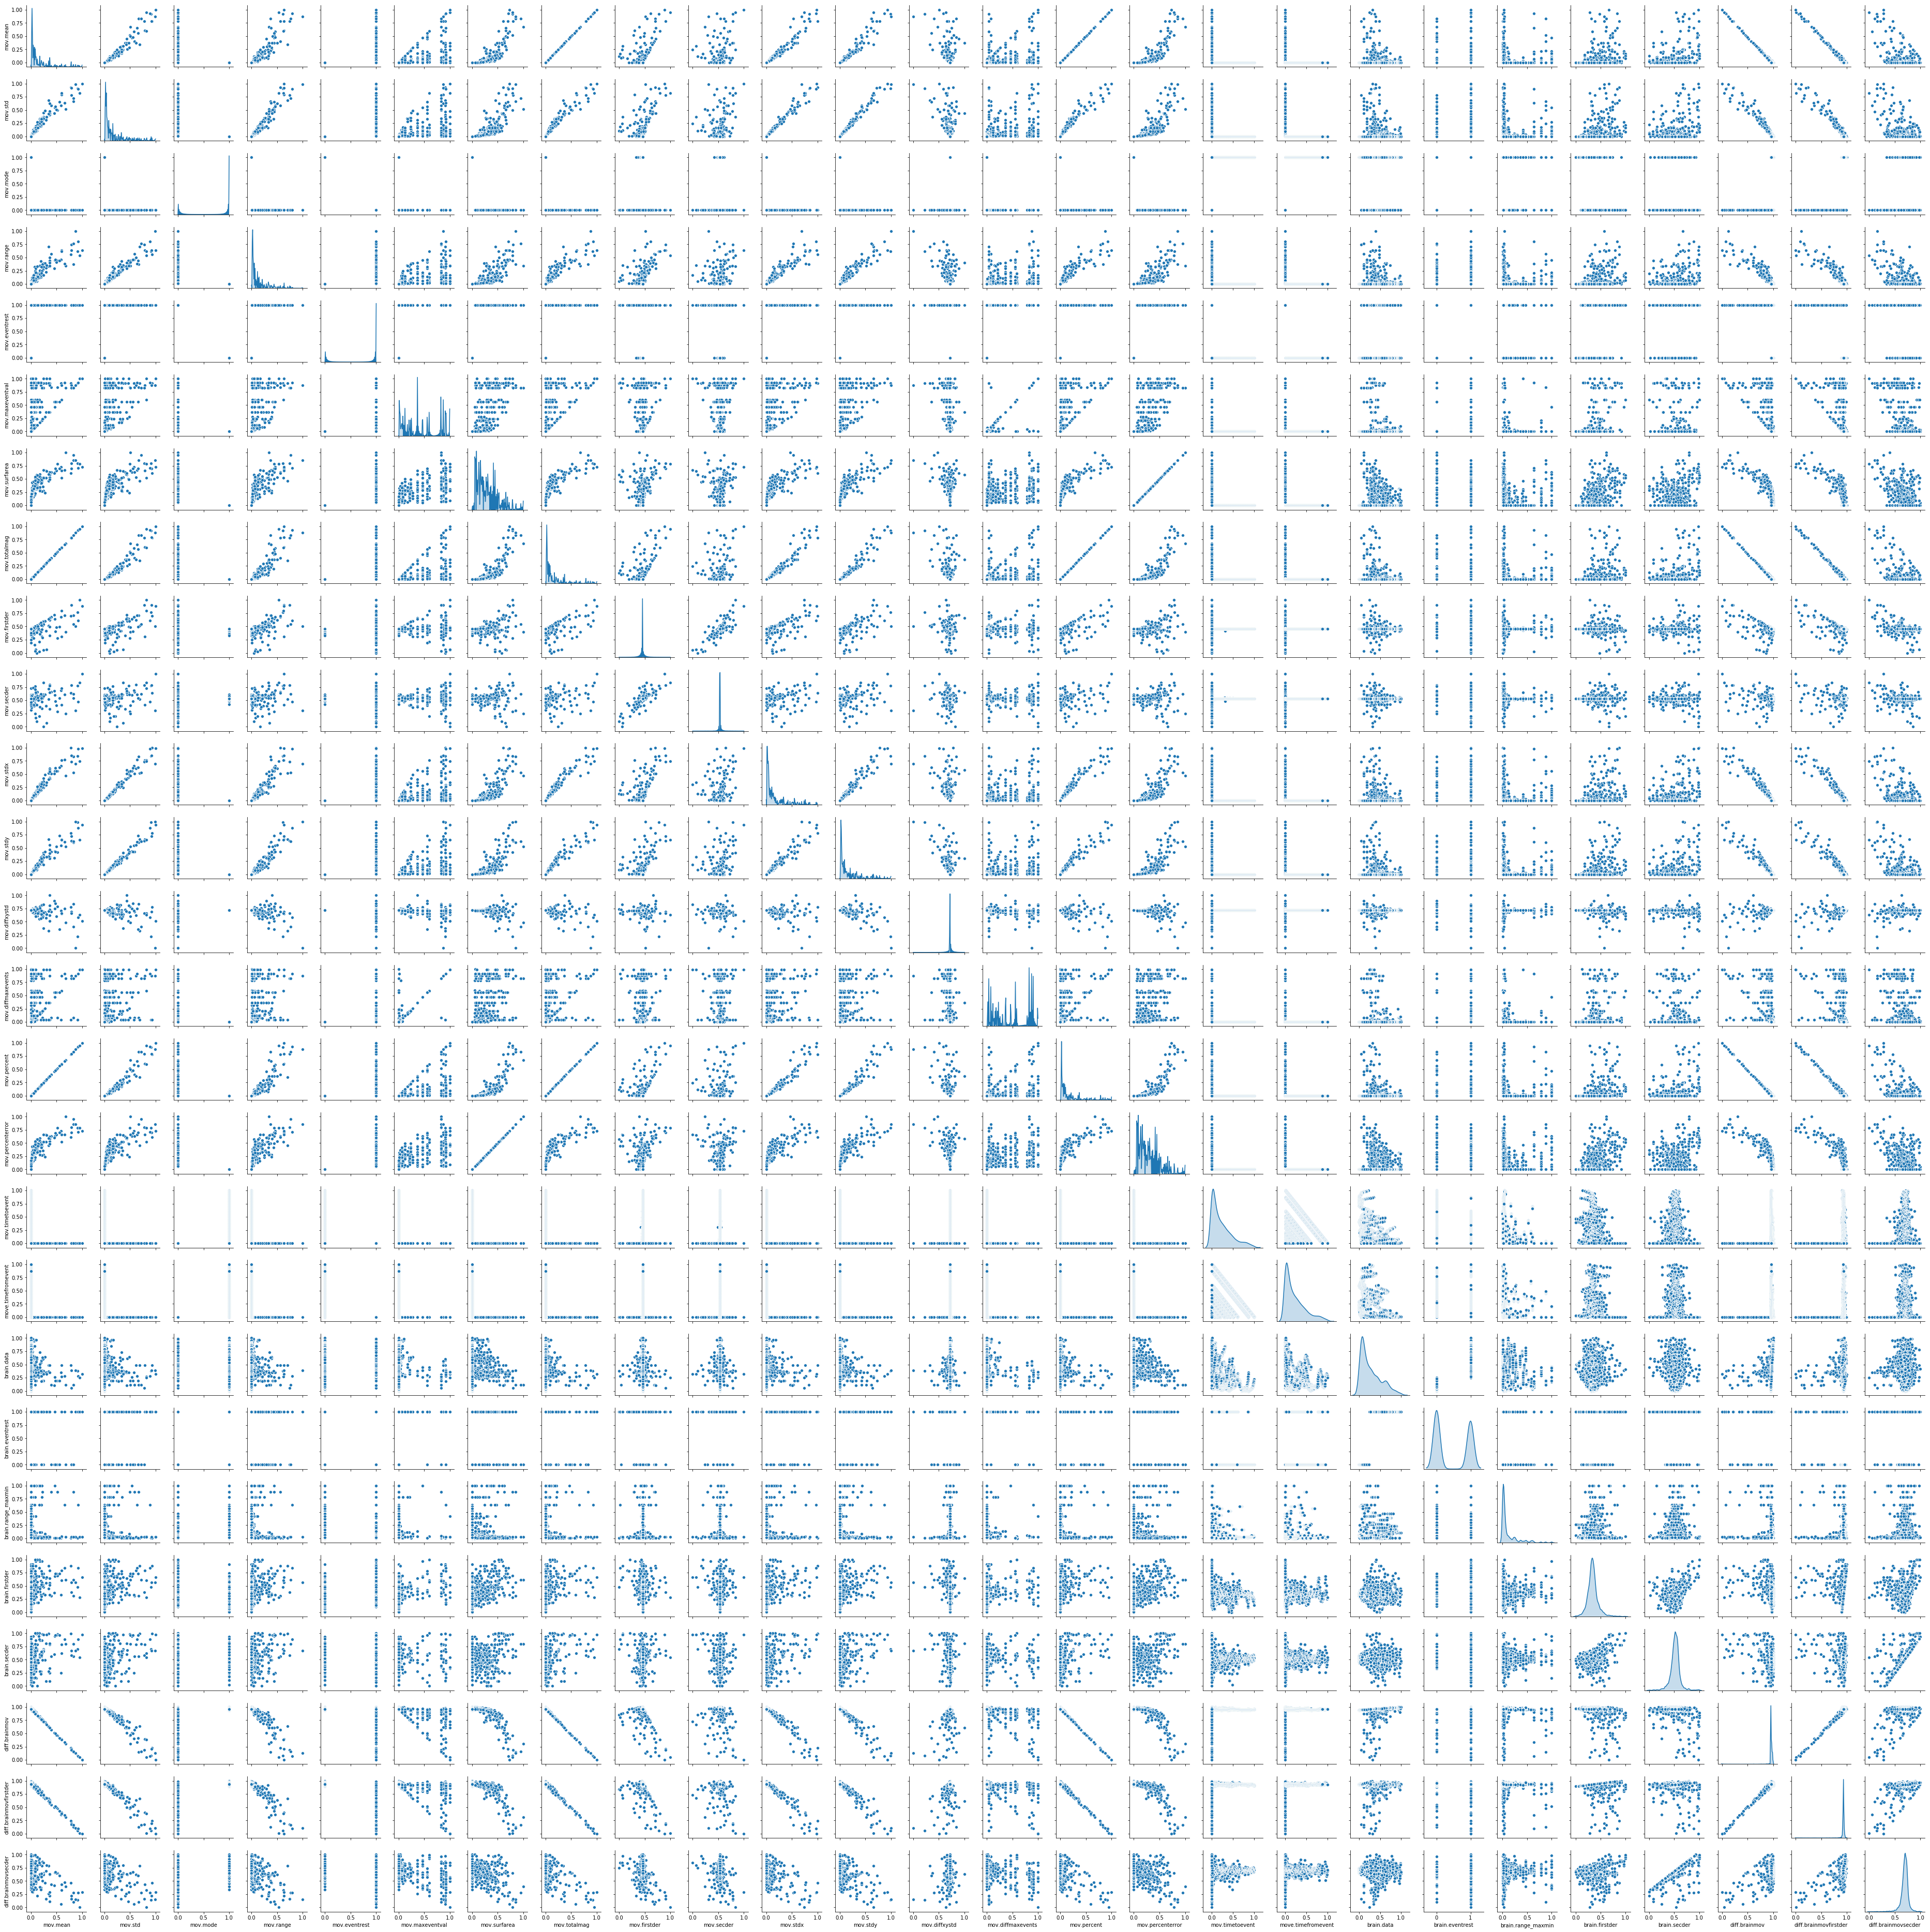

In [6]:
# Both temporal and spatial metrics visualize  
sns.pairplot(data, 
             diag_kind="kde", height = 2)
plt.savefig('/Users/emmadionne/Documents/metrics_pairplot.png')
#plt.show()

In [42]:
print(sns.__version__)

0.9.0
